# Mount Rainier Weather and Climbing Data


<img src='dataset-cover.jpg'>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


          # Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


          # Modelling
from sklearn.model_selection import train_test_split

          # Error - Success
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

    # Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import warnings
warnings.filterwarnings("ignore")

In [5]:
df_climbing = pd.read_csv("climbing_statistics.csv")

In [6]:
df_weather = pd.read_csv("Rainier_Weather.csv")

In [7]:
df =df_weather.merge(df_climbing ,on ='Date')

# EDA

In [8]:
df.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Route,Attempted,Succeeded,Success Percentage
0,11/27/2015,13.643750,26.321667,19.715000,27.839583,68.004167,88.496250,Disappointment Cleaver,2,0,0.0
1,11/21/2015,13.749583,31.300000,21.690708,2.245833,117.549667,93.660417,Disappointment Cleaver,3,0,0.0
2,10/15/2015,13.461250,46.447917,27.211250,17.163625,259.121375,138.387000,Disappointment Cleaver,2,0,0.0
3,10/13/2015,13.532083,40.979583,28.335708,19.591167,279.779167,176.382667,Little Tahoma,8,0,0.0
4,10/9/2015,13.216250,38.260417,74.329167,65.138333,264.687500,27.791292,Disappointment Cleaver,2,0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1894
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1895 non-null   object 
 1   Battery Voltage AVG    1895 non-null   float64
 2   Temperature AVG        1895 non-null   float64
 3   Relative Humidity AVG  1895 non-null   float64
 4   Wind Speed Daily AVG   1895 non-null   float64
 5   Wind Direction AVG     1895 non-null   float64
 6   Solare Radiation AVG   1895 non-null   float64
 7   Route                  1895 non-null   object 
 8   Attempted              1895 non-null   int64  
 9   Succeeded              1895 non-null   int64  
 10  Success Percentage     1895 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 177.7+ KB


In [11]:
df.isnull().sum()

Date                     0
Battery Voltage AVG      0
Temperature AVG          0
Relative Humidity AVG    0
Wind Speed Daily AVG     0
Wind Direction AVG       0
Solare Radiation AVG     0
Route                    0
Attempted                0
Succeeded                0
Success Percentage       0
dtype: int64

# Feature Engineering

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['Month'] = df['Date'].dt.month
dataset =df.drop('Date', axis =1)

# Visualization

In [16]:
df.corr()

,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG,Attempted,Succeeded,Success Percentage,Month
Battery Voltage AVG,1.000000,-0.611755,0.342628,0.173537,0.132591,-0.369460,-0.062858,-0.049984,-0.050447,-0.523719
Temperature AVG,-0.611755,1.000000,-0.601169,-0.186273,-0.099525,0.544913,-0.008270,0.089728,0.116363,0.301278
Relative Humidity AVG,0.342628,-0.601169,1.000000,0.247994,0.232665,-0.417288,0.105652,-0.019143,-0.071171,-0.066425
Wind Speed Daily AVG,0.173537,-0.186273,0.247994,1.000000,0.182568,-0.301600,0.090299,-0.061649,-0.103364,0.012434
Wind Direction AVG,0.132591,-0.099525,0.232665,0.182568,1.000000,-0.182975,-0.024238,-0.056980,-0.067767,-0.194789
Solare Radiation AVG,-0.369460,0.544913,-0.417288,-0.301600,-0.182975,1.000000,-0.014541,0.164917,0.226829,0.307927
Attempted,-0.062858,-0.008270,0.105652,0.090299,-0.024238,-0.014541,1.000000,0.552087,0.066953,0.147409
Succeeded,-0.049984,0.089728,-0.019143,-0.061649,-0.056980,0.164917,0.552087,1.000000,0.745922,0.046789
Success Percentage,-0.050447,0.116363,-0.071171,-0.103364,-0.067767,0.226829,0.066953,0.745922,1.000000,0.026353
Month,-0.523719,0.301278,-0.066425,0.012434,-0.194789,0.307927,0.147409,0.046789,0.026353,1.000000


<Axes: >

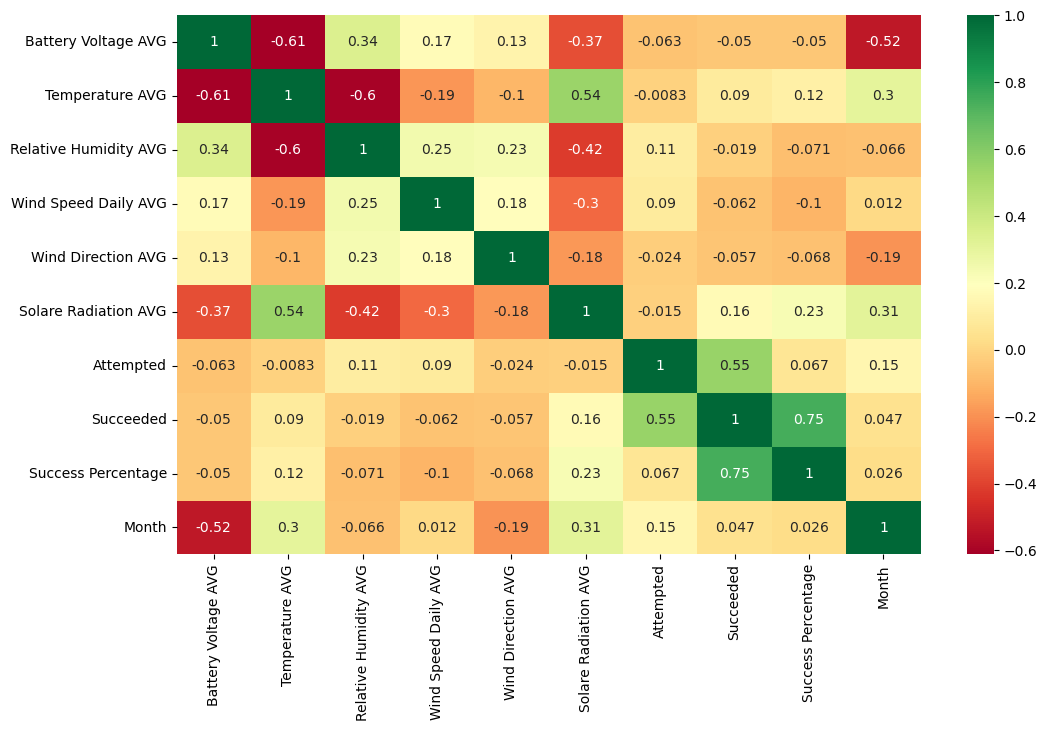

In [15]:
plt.figure(figsize =(12,7)) 
sns.heatmap(df.corr(), annot =True , cmap ='RdYlGn')

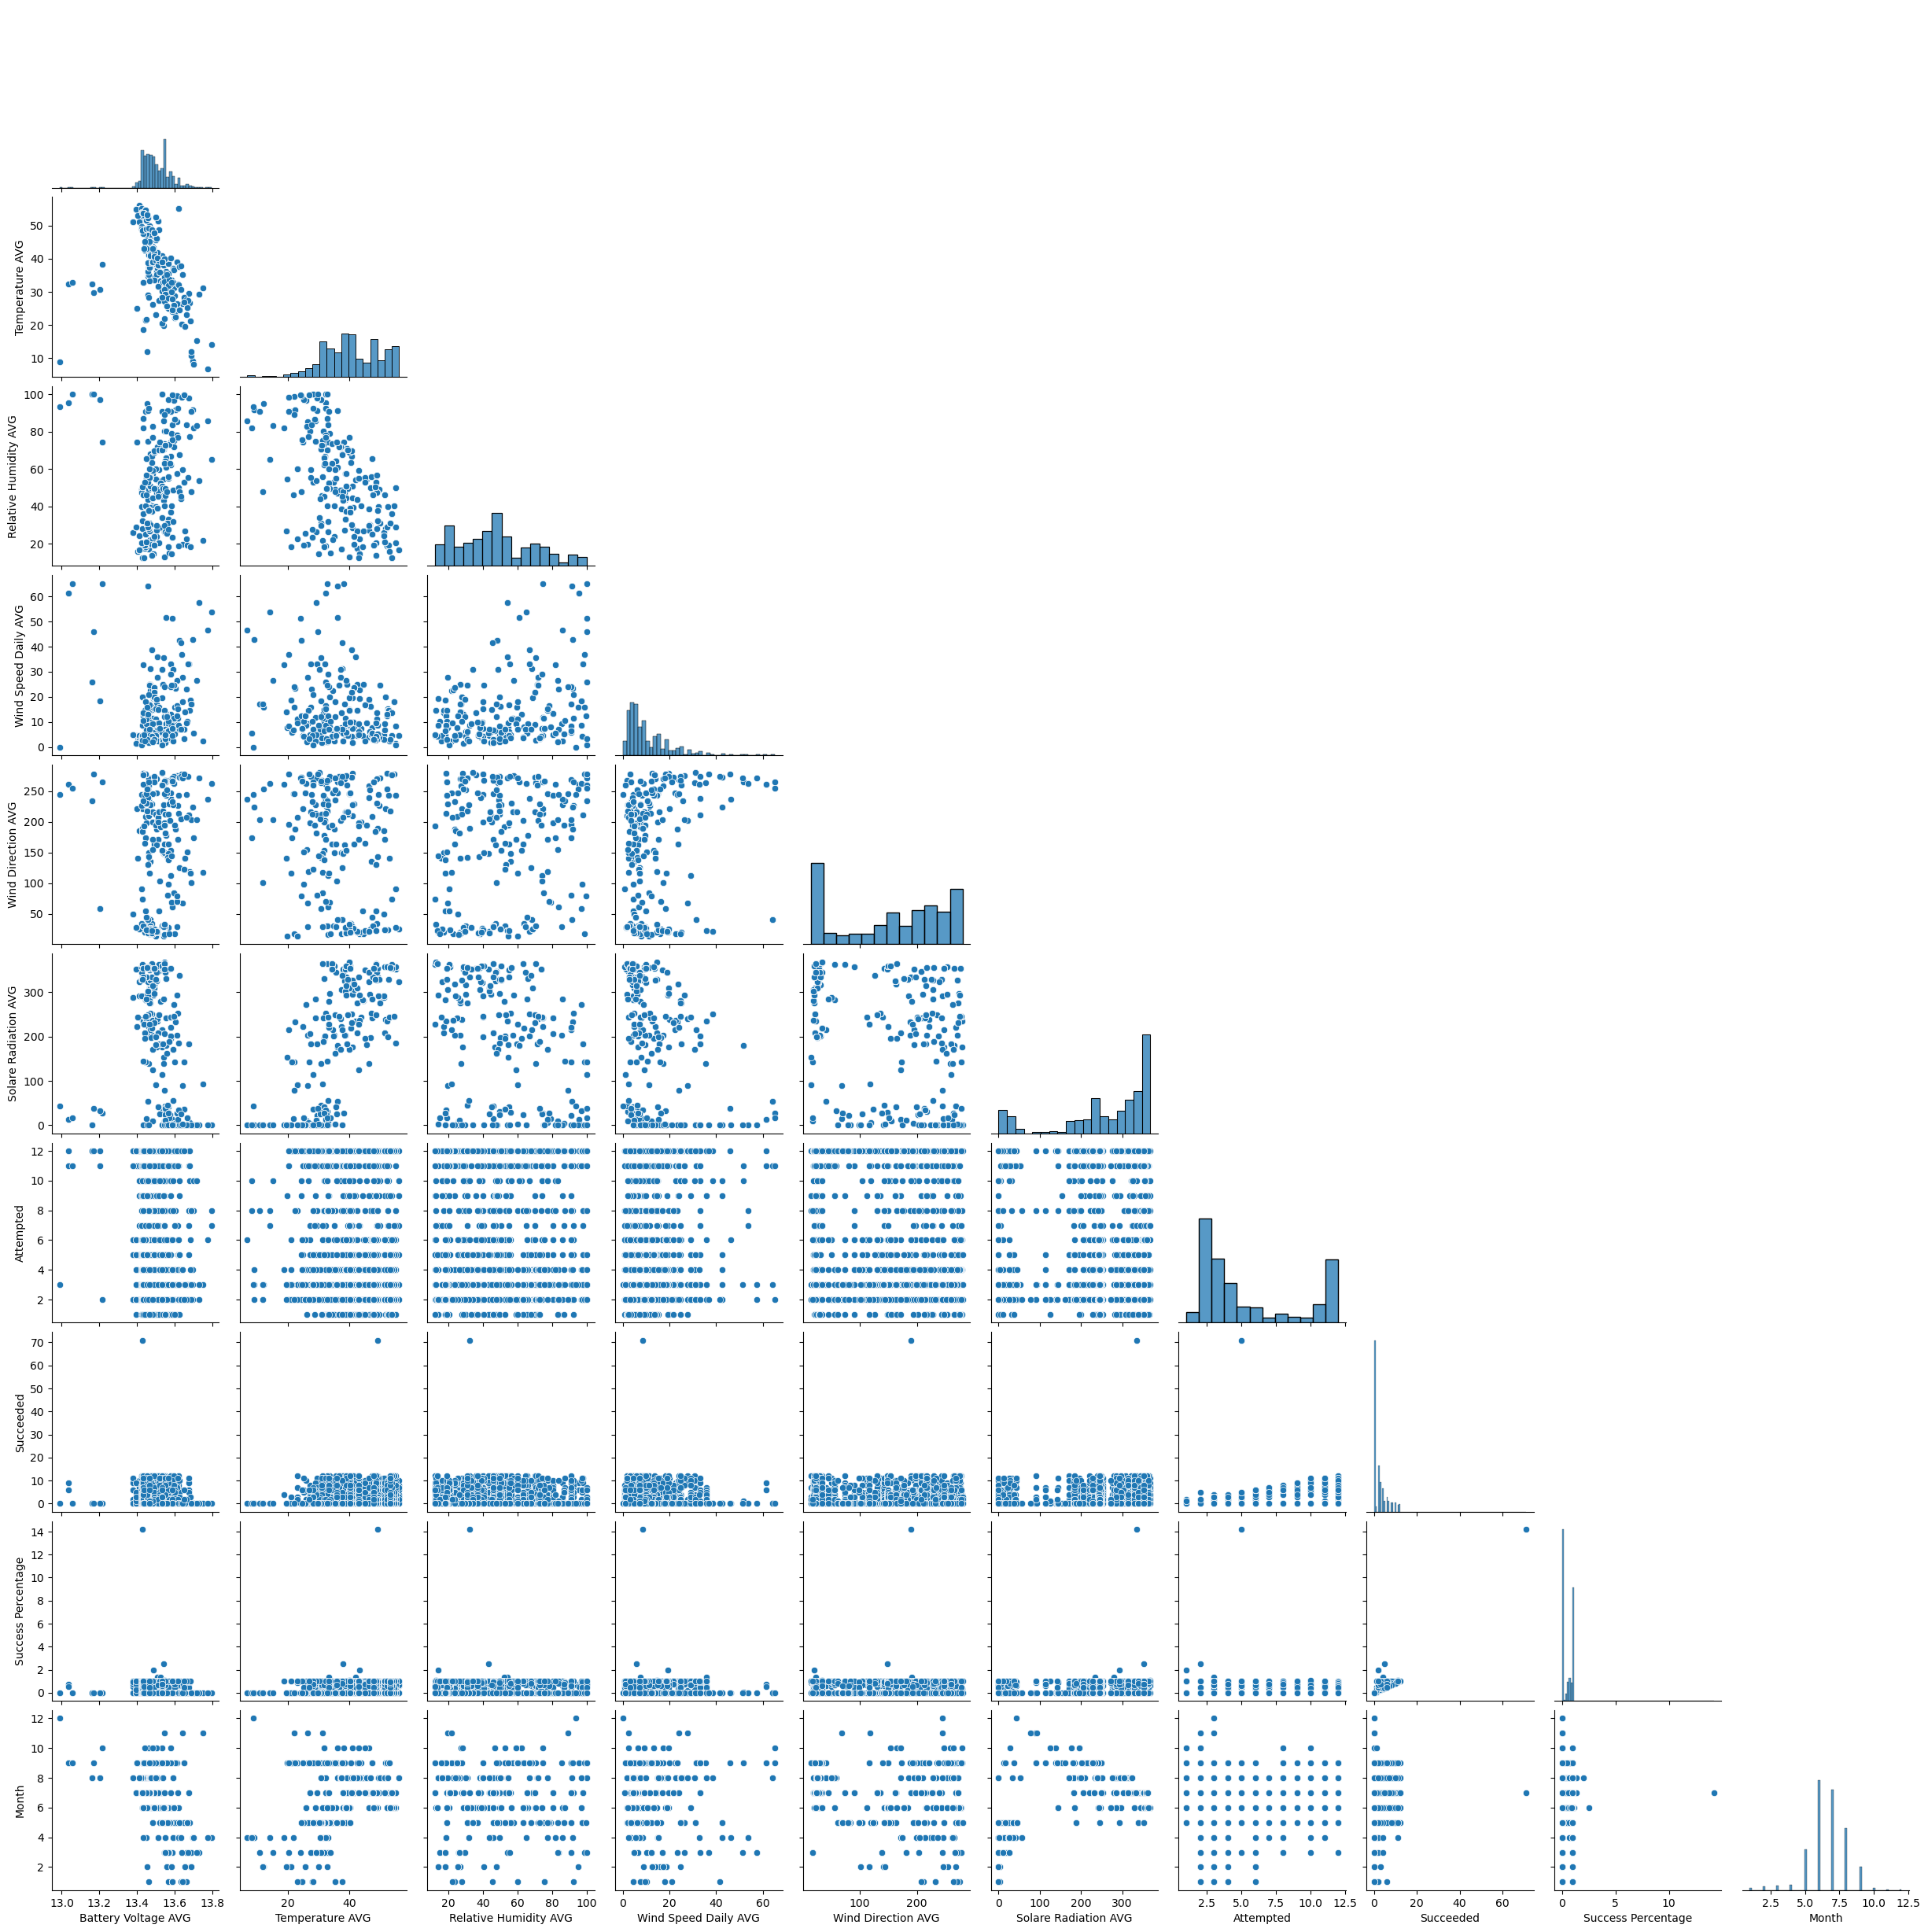

In [17]:
sns.pairplot(df, corner = True)

# Modelling & Testing

In [18]:
x = df.drop(["Success Percentage","Date"],axis=1)
y = df["Success Percentage"]
x = pd.get_dummies(x,drop_first=True)

# classical Modeling

In [19]:
def algo_test(x,y):
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    ADA = AdaBoostRegressor()
    RND = RandomForestRegressor()
    DTR = DecisionTreeRegressor()
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    
    algos=[L,R,Lass,E,ETR,GBR,ADA,RND,DTR]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','Ada Boost','Decision Tree','Random Forest']
        
    r_squared= []
    rmse= []
    mae= []
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**.5)
        mae.append(mean_absolute_error(y_test,p))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    return result.sort_values('R_Squared',ascending=False)

In [20]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Random Forest,0.986009,0.055462,0.004705
Gradient Boosting,0.985878,0.055722,0.012091
Decision Tree,0.985355,0.056744,0.009248
Extra Tree,0.970704,0.080255,0.009244
Ada Boost,0.948351,0.106562,0.055782
Ridge,0.623536,0.287696,0.253920
Linear,0.622742,0.287999,0.254114
ElasticNet,0.440008,0.350883,0.303624
Lasso,0.356578,0.376114,0.329827


# Deep Learning

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

In [23]:
model = Sequential()
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=128, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 22ms/step - loss: 0.5479 - val_loss: 0.3055
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3662 - val_loss: 0.2573
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3498 - val_loss: 0.2437
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3492 - val_loss: 0.2009
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3242 - val_loss: 0.2037
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3187 - val_loss: 0.2183
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3129 - val_loss: 0.1917
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2992 - val_loss: 0.1838
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3068 - val_loss: 0.2628
Epoch 10/100
12/12 [==============================] - 0s 8ms/step - loss: 0.2965 - val_loss: 0.1967
Epoch 11

Epoch 83/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0410 - val_loss: 0.0229
Epoch 84/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0200 - val_loss: 0.0177
Epoch 85/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.0140
Epoch 86/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0089
Epoch 87/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0076
Epoch 88/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0046 - val_loss: 0.0063
Epoch 89/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0060
Epoch 90/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0033 - val_loss: 0.0086
Epoch 91/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 92/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0056


In [24]:
guess = model.predict(x_test)
r2_score(guess,y_test)

12/12 [==============================] - 0s 3ms/step


0.969833445655662

In [25]:
(mean_squared_error(y_test, guess))**0.5

0.07692268360684172

<Axes: >

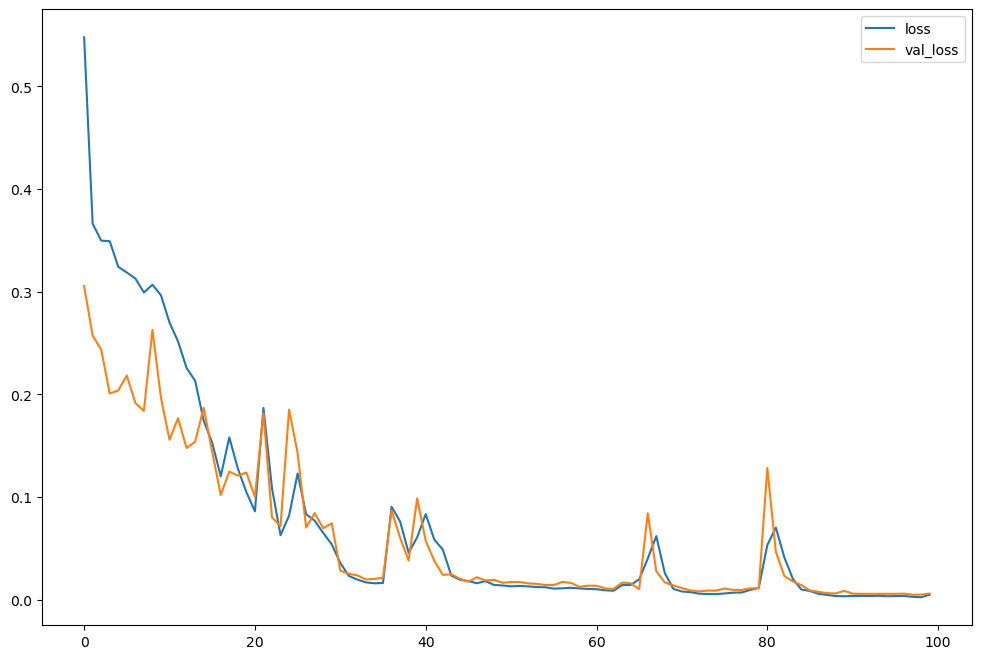

In [26]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

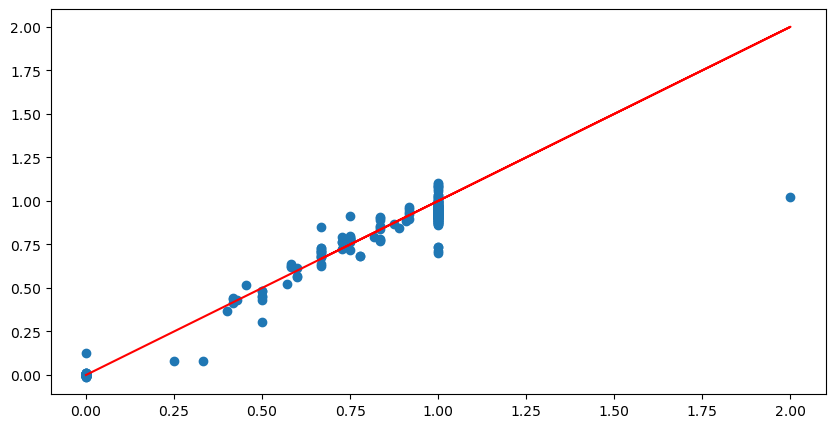

In [27]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,guess)
plt.plot(y_test,y_test,'r')

# Pycaret Regression Modellerimize bir  baklım

In [28]:
from pycaret.regression import *
setup(df, target='Success Percentage')

,Description,Value
0,Session id,1029
1,Target,Success Percentage
2,Target type,Regression
3,Original data shape,"(1895, 12)"
4,Transformed data shape,"(1895, 34)"
5,Transformed train set shape,"(1326, 34)"
6,Transformed test set shape,"(569, 34)"
7,Numeric features,9
8,Date features,1
9,Categorical features,1


In [29]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0152,0.1332,0.1414,0.9111,0.0298,0.0155,0.1730
gbr,Gradient Boosting Regressor,0.0212,0.1305,0.1490,0.9110,0.0347,0.0280,0.1550
et,Extra Trees Regressor,0.0140,0.1342,0.1422,0.9098,0.0302,0.0133,0.1440
dt,Decision Tree Regressor,0.0170,0.1349,0.1539,0.9075,0.0369,0.0218,0.0480
rf,Random Forest Regressor,0.0211,0.1352,0.1561,0.9056,0.0382,0.0333,0.1740
lightgbm,Light Gradient Boosting Machine,0.0375,0.1380,0.1847,0.8895,0.0540,0.0596,0.3150
ada,AdaBoost Regressor,0.0744,0.1514,0.2315,0.8452,0.0834,0.1940,0.0690
br,Bayesian Ridge,0.2528,0.0955,0.3035,0.6415,0.1992,0.2763,0.0470
ridge,Ridge Regression,0.2519,0.0957,0.3039,0.6404,0.1999,0.2749,0.0380
lr,Linear Regression,0.2526,0.0966,0.3054,0.6366,0.2011,0.2752,0.3620


Processing:   0%|          | 0/81 [00:00<?, ?it/s]